## Airfare prediction - dometic Indian flight prices in 2019

#### In this notebook we carry EDA to answer some interesting questions about dometic Indian flight prices.
###### This work is part of the Udemy course "Data Science Real World Projects in Python". All the datasets used for the projects are from the course.

#### Findings : 

- The highest number of flight departures are reported in the morning between 05:00-12:00 whereas the least is reported at night from 21:00-05:00.
- Jet Airways has the highest percentahe of flight operaions which add up to 36%.
- There are five source-destination pairs exists in the dataset. Out of that the highest percentage of flights are operated between Delhi and Cochin (42%). 
- Air India, Vistara, SpiceJet, and IndiGo airines fly to all the destinations mentioned in this dataset. 
- New Delhi to Cochin has the highest mean flight duration which is 817.85 minutes. Where as, Chennai to Kolkata flight only takes about 139.6 minutes on average with no lay overs.
- Spice jet offers the cheapest prices between New Delhi and Cochin which is INR  5916.35 on average.
- BOM airport has the highest number of layover flights considering all the destinations. 


In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#!pip3 install cufflinks

In [272]:
train_data = pd.read_csv(r"Cleaned_Train.csv")

In [273]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,445
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,35,285


In [274]:
#Q1 : Vizualize the number of flights departed at the below times (use Dep_Time_hour).
     # morning (05:00-12:00), afternoon (12:00-17:00), evening(17:00-21:00), and night(21:00-05:00).

def flight_count(d_time):
    
    if d_time > 5 and d_time <= 12 :
        return 'Morning'
    elif d_time > 12 and d_time <= 17:
        return 'Afternoon'
    elif d_time > 17 and d_time <= 21:
        return 'Evening'
    else: 
        return 'Night'


In [275]:
#Flight count 
train_data['Dep_Time_hour'].apply(flight_count).value_counts()

Morning      4460
Afternoon    2426
Evening      2154
Night        1642
Name: Dep_Time_hour, dtype: int64

The highest number of flight departures are reported in the morning whereas the least is at night.

<AxesSubplot:>

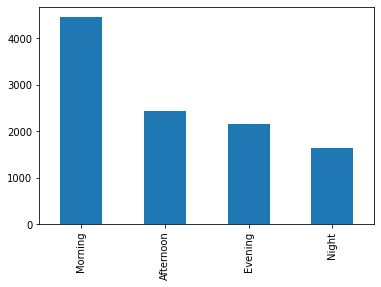

In [276]:
#Flight vizualization
train_data['Dep_Time_hour'].apply(flight_count).value_counts().plot(kind='bar')

In [277]:
#Q2 : How many flights are operated by each of the ailines?
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [329]:
train_data['Airline'].value_counts(normalize=True)

Jet Airways                          0.360326
IndiGo                               0.192192
Air India                            0.163921
Multiple carriers                    0.111964
SpiceJet                             0.076577
Vistara                              0.044842
Air Asia                             0.029863
GoAir                                0.018161
Multiple carriers Premium economy    0.001217
Jet Airways Business                 0.000562
Vistara Premium economy              0.000281
Trujet                               0.000094
Name: Airline, dtype: float64

<AxesSubplot:ylabel='Airline'>

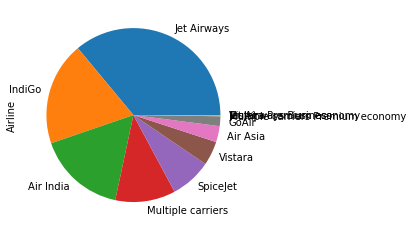

In [278]:
train_data['Airline'].value_counts().plot(kind='pie')

Jet airways carier operates the highest number of flights followed by Indigo and Air india.

In [313]:
#Q3 : How many unique source-destination pairs exists and how many flights are flown between them?

sd_df = pd.DataFrame(train_data[['Source','Destination']].apply("-".join, axis=1), columns=['Source-Destination'])
sd_df.head()

,Source-Destination
0,Banglore-New Delhi
1,Kolkata-Banglore
2,New Delhi-Cochin
3,Kolkata-Banglore
4,Banglore-New Delhi


In [280]:
# How many unique source-destination pairs exists?
sd_df['Source-Destination'].unique()

array(['Banglore-New Delhi', 'Kolkata-Banglore', 'New Delhi-Cochin',
       'Chennai-Kolkata', 'Mumbai-Hyderabad'], dtype=object)

<AxesSubplot:>

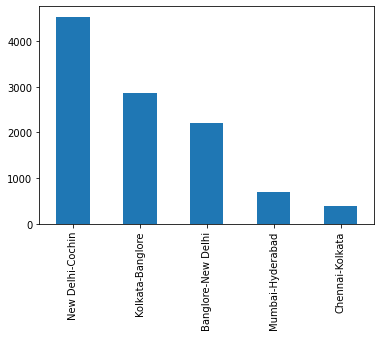

In [314]:
#How many flights are flown between the destinations?
sd_df['Source-Destination'].value_counts().plot(kind='bar')

There are five source-destination pairs exists. Out of them the  highest number of flights are operated between Delhi and Cochin. 

In [282]:
#Q4 : For each airline compute the number of flight destinations they fly to in discending order.

train_data['Source-Destination'] = train_data[['Source','Destination']].apply("-".join, axis=1)


In [283]:
train_data.groupby(['Airline'])['Source-Destination'].nunique().sort_values(ascending=False)

Airline
Air India                            5
IndiGo                               5
SpiceJet                             5
Vistara                              5
Jet Airways                          4
Air Asia                             3
GoAir                                3
Jet Airways Business                 2
Vistara Premium economy              2
Multiple carriers                    1
Multiple carriers Premium economy    1
Trujet                               1
Name: Source-Destination, dtype: int64

Air India, Vistara, SpiceJet, and IndiGo airines fly to all the destinations mentioned in this dataset. 

In [284]:
#Q5 For each source-destination pair what is the average duration and the number of stops (rounded to the next int).

df = train_data.groupby(['Source-Destination'])['Duration_in_mins','Total_Stops'].mean().reset_index()


/var/folders/4b/r_p92ss978z32lh_qlxs17lr0000gn/T/ipykernel_20850/1121397470.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [285]:
df['Total_Stops'] = np.ceil(df['Total_Stops'])

In [286]:
df

,Source-Destination,Duration_in_mins,Total_Stops
0,Banglore-New Delhi,376.329085,1.0
1,Chennai-Kolkata,139.619423,0.0
2,Kolkata-Banglore,747.248346,1.0
3,Mumbai-Hyderabad,191.714491,1.0
4,New Delhi-Cochin,817.852734,2.0


We can notice that Delhi-Cochin	and Kolkata-Banglore has the highest mean number of stops. Also this route has the highest mean duration which is 817.85 minutes. On the other hand Chennai-Kolkata	route only takes 139.6 minutes on average where the average number of  stops is 0. This indicates that higher the flight duration higher the chance of having more lay overs.

In [302]:
# Q6 : Which airline provides the most number of flights between Delhi and Cochin?
tmp_df = train_data[train_data['Source-Destination']=='New Delhi-Cochin']
tmp_df.groupby(['Airline','Source-Destination']).count().iloc[:,0].sort_values(ascending= False)


Airline                            Source-Destination
Jet Airways                        New Delhi-Cochin      1586
Multiple carriers                  New Delhi-Cochin      1196
Air India                          New Delhi-Cochin       746
IndiGo                             New Delhi-Cochin       705
SpiceJet                           New Delhi-Cochin        87
Air Asia                           New Delhi-Cochin        80
GoAir                              New Delhi-Cochin        76
Vistara                            New Delhi-Cochin        45
Multiple carriers Premium economy  New Delhi-Cochin        13
Jet Airways Business               New Delhi-Cochin         2
Name: Source, dtype: int64

Jet Airways provides the highest number of flights between Delhi and Cochin followed by Multiple carriers. 

In [288]:
# Q6 : Between Jet Airways and Multiple carriers which provides the most efficient flights between Delhi and Cochin based on theier mean duration?

#filter data
tmp_df = train_data[  (train_data['Source-Destination']=='New Delhi-Cochin') & ( (train_data['Airline'] =="Jet Airways") | (train_data['Airline'] =="Multiple carriers") ) ]
tmp_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_in_mins,Source-Destination
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,1140,New Delhi-Cochin
9,Multiple carriers,New Delhi,Cochin,DEL → BOM → COK,1,No info,8625,27,5,11,25,19,15,470,New Delhi-Cochin
17,Jet Airways,New Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,10262,6,12,14,0,12,35,1355,New Delhi-Cochin
19,Jet Airways,New Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,12898,27,5,16,0,12,35,1235,New Delhi-Cochin
25,Jet Airways,New Delhi,Cochin,DEL → IDR → BOM → COK,2,No info,13292,6,9,21,25,12,35,910,New Delhi-Cochin


In [289]:
#summray stats
tmp_df.groupby('Airline').agg({'Duration_in_mins' : ['mean'], 'Total_Stops' : ['mean'], 'Dep_Time_hour' : ['mean','std']})

Duration_in_mins Total_Stops Dep_Time_hour          
                              mean        mean          mean       std
Airline                                                               
Jet Airways            1031.283102    1.405422     13.242749  6.023170
Multiple carriers       625.769231    1.049331     10.062709  3.802036

We can see that between the above to carriers Multiple carriers	offers more efficient flights with less avg stops. Also, we can see while Jet airways on average fly in the afternoon (13:00 ± 6h)  Multiple carriers fly in the morning hours (10:00±4).

In [304]:
# Q7 : Which city has the highest number of destination flights?
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
New Delhi    2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Cochin has the highest number of flights in the given period.

In [306]:
# Q8 : What are average cost of flying to each of the destinations?

train_data.groupby(['Source-Destination'])['Price'].mean()


Source-Destination
Banglore-New Delhi     8017.464269
Chennai-Kolkata        4789.892388
Kolkata-Banglore       9158.389411
Mumbai-Hyderabad       5059.708752
New Delhi-Cochin      10540.113536
Name: Price, dtype: float64

We can see that average cost of  flying between New Delhi-Cochin is the highest followed by Kolkata-Banglore.

In [309]:
# Q9 : Which air line offers the cheapest flights between New Delhi-Cochin ?
train_data[train_data['Source-Destination']=='New Delhi-Cochin'].groupby(['Source-Destination','Airline'])['Price'].mean().sort_values(ascending=True)

Source-Destination  Airline                          
New Delhi-Cochin    SpiceJet                              5916.356322
                    Vistara                               6465.644444
                    GoAir                                 6587.157895
                    IndiGo                                7203.933333
                    Air Asia                              7804.175000
                    Air India                            10003.446381
                    Multiple carriers                    10902.678094
                    Multiple carriers Premium economy    11418.846154
                    Jet Airways                          12642.593317
                    Jet Airways Business                 49387.500000
Name: Price, dtype: float64

Spice jet offers the cheapest prices between New Delhi and Cochin which is INR  5916.356322.

In [290]:
# Q10 : What is the most common layover/ stop airport for each destination. 

#subset of columns where atleast one layover is present.
df_tmp = train_data[train_data['Total_Stops']>=1][['Source-Destination','Route']]
df_tmp.reset_index(drop=True)

,Source-Destination,Route
0,Kolkata-Banglore,CCU → IXR → BBI → BLR
1,New Delhi-Cochin,DEL → LKO → BOM → COK
2,Kolkata-Banglore,CCU → NAG → BLR
3,Banglore-New Delhi,BLR → NAG → DEL
4,Banglore-New Delhi,BLR → BOM → DEL
...,...,...
7186,New Delhi-Cochin,DEL → AMD → BOM → COK
7187,New Delhi-Cochin,DEL → AMD → BOM → COK
7188,Banglore-New Delhi,BLR → BOM → DEL
7189,New Delhi-Cochin,DEL → BOM → COK


In [291]:
df_tmp['Layover list'] = df_tmp['Route'].str.split("→",expand=False)
df_tmp

,Source-Destination,Route,Layover list
1,Kolkata-Banglore,CCU → IXR → BBI → BLR,"[CCU , IXR , BBI , BLR]"
2,New Delhi-Cochin,DEL → LKO → BOM → COK,"[DEL , LKO , BOM , COK]"
3,Kolkata-Banglore,CCU → NAG → BLR,"[CCU , NAG , BLR]"
4,Banglore-New Delhi,BLR → NAG → DEL,"[BLR , NAG , DEL]"
6,Banglore-New Delhi,BLR → BOM → DEL,"[BLR , BOM , DEL]"
...,...,...,...
10671,New Delhi-Cochin,DEL → AMD → BOM → COK,"[DEL , AMD , BOM , COK]"
10672,New Delhi-Cochin,DEL → AMD → BOM → COK,"[DEL , AMD , BOM , COK]"
10673,Banglore-New Delhi,BLR → BOM → DEL,"[BLR , BOM , DEL]"
10675,New Delhi-Cochin,DEL → BOM → COK,"[DEL , BOM , COK]"


In [292]:
layover_dict = {}
for key, l_list in zip(df_tmp['Source-Destination'], df_tmp['Layover list']):
    #remove source and destination air ports
    new_l_list = l_list [1:-1]
    #remove trailing/ preceding spaces
    new_l_list = [item.strip() for item in new_l_list]

    sub_dict = dict.fromkeys(new_l_list,1)
    #print("sub_dict : ", sub_dict)

    if key not in layover_dict.keys():
        #print("add main key : ", key)
        layover_dict[key] = sub_dict

        #for sub_key in sub_dict.keys():
        #    sub_dict[sub_key] = 1
    else:    
        #print("main key exists : ", key)
        for new_key in sub_dict.keys():
            if new_key in layover_dict[key].keys():
                #print("sub key exists", layover_dict[key].keys())
                layover_dict[key][new_key] += 1
            else:
                #print("sub key not exists")
                layover_dict[key].update({new_key : 1})
                #print(layover_dict[key])


In [293]:
# sum the number of layover flight for each airpot.
from collections import defaultdict
prev_sums = defaultdict(int)

for key, value in layover_dict.items():
    for inner_key in value:
        value[inner_key] += prev_sums[inner_key]
        prev_sums[inner_key] = value[inner_key]

In [294]:
df_layovers = pd.DataFrame.from_dict(prev_sums, orient='index').reset_index()
df_layovers.columns = ['Airport','Number of layovers']
df_layovers.sort_values(by='Number of layovers', ascending=False)

,Airport,Number of layovers
3,BOM,4980
5,DEL,791
7,HYD,582
6,MAA,344
12,AMD,299
8,JAI,261
26,BLR,236
1,BBI,129
28,IDR,121
2,NAG,111


We can see that BOM airport has the highest number of layovers considering all the destinations. If we consider destination wise then we can obtain the below information.
- Kolkata-Banglore -> BOM (1101)
- Delhi-Cochin -> BOM (4532)
- Banglore-New Delhi -> BOM (4980)
- Mumbai-Hyderabad -> DEL (791)

In [298]:

#layover_dict


In [319]:
# Q11: What are the top 10 routes for Jet Airways?
train_data[train_data['Airline']=='Jet Airways'].groupby('Route').count().iloc[:,0].sort_values(ascending=False)[0:10]

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
Name: Airline, dtype: int64

### Bivariate analysis

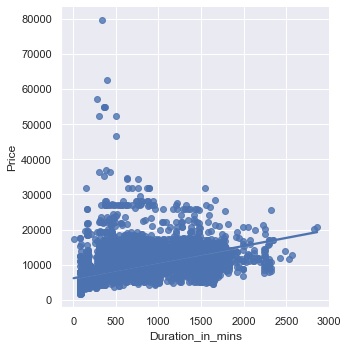

In [326]:
# Realtionship between price vs duration
sns.set(rc = {'figure.figsize':(15,8)})
sns.lmplot(data=train_data, x='Duration_in_mins', y='Price')

In [312]:
np.corrcoef(train_data['Duration_in_mins'],train_data['Price'])[0][1]

0.506479761562851

From the above graph and the computed correlation co-efficient values we can see that there is a positive correlation between the flight time and price.

<AxesSubplot:xlabel='Total_Stops', ylabel='Duration_in_mins'>

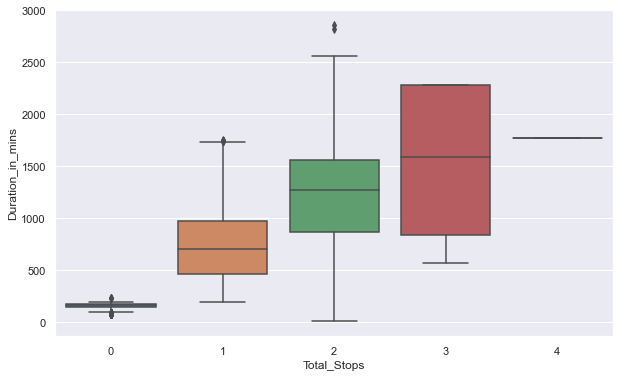

In [335]:
# Realtionship between number of stops vs duration
sns.set(rc = {'figure.figsize':(10,6)})
sns.boxplot(data=train_data, x='Total_Stops', y='Duration_in_mins')

We can clearly see that longer flights have more lay overs.

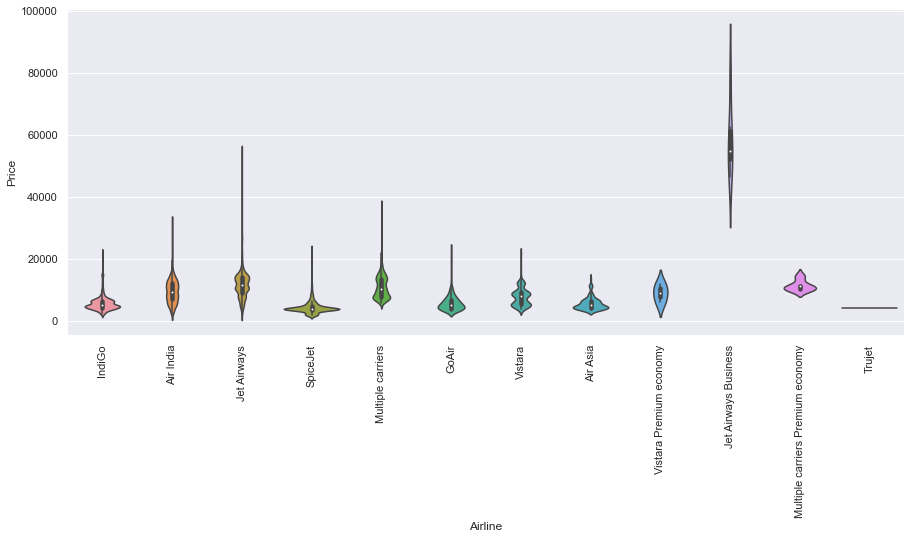

In [328]:
# Realtionship between price vs airline
sns.set(rc = {'figure.figsize':(15,6)})
sns.violinplot(data=train_data,x='Airline',y='Price')
a=plt.xticks(rotation=90)